In [3]:
import datetime as dt
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.articles import fetch_articles_by_month, articles_to_df
from nytimes_scraper.comments import fetch_comments, fetch_comments_by_article, comments_to_df

api = NytApi('FYkXHSbZsX1UXEq8eA7LLhrO1h6m2GSv')


In [1]:


# # Fetch articles of a specific month
# articles = fetch_articles_by_month(api, dt.date(2020, 2, 1))
# article_df = articles_to_df(articles)

# # Fetch comments from multiple articles
# # a) using the results of a previous article query
# article_ids_and_urls = list(article_df['web_url'].iteritems())
# comments_a = fetch_comments(api, article_ids_and_urls)
# comment_df = comments_to_df(comments_a)

# # b) using a custom list of articles
# comments_b = fetch_comments(api, article_ids_and_urls=[
#     ('nyt://article/316ef65c-7021-5755-885c-a9e1ef2cfdf2', 'https://www.nytimes.com/2020/01/03/world/middleeast/trump-iran-suleimani.html'),
#     ('nyt://article/b2d1b802-412e-51f7-8864-efc931e87bb3', 'https://www.nytimes.com/2020/01/04/opinion/impeachment-witnesses.html'),
# ])

# Fetch comment for one specific article by its URL
comments_c = fetch_comments_by_article(api, 'https://www.nytimes.com/2023/05/30/technology/ai-threat-warning.html')

In [2]:
comments_c[0].keys()

dict_keys(['commentID', 'status', 'commentSequence', 'userID', 'userDisplayName', 'userLocation', 'userTitle', 'userURL', 'picURL', 'commentTitle', 'commentBody', 'createDate', 'updateDate', 'approveDate', 'recommendations', 'replyCount', 'replies', 'editorsSelection', 'parentID', 'parentUserDisplayName', 'depth', 'commentType', 'trusted', 'recommendedFlag', 'permID', 'isAnonymous'])

In [4]:
comms = []

for item in comments_c:
    comms.append(item['commentBody'])
    if item['replyCount'] > 0:
        for reply in item['replies']:
            comms.append(reply['commentBody'])


In [5]:
len(comms)

1448

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd


In [5]:
sen_df = pd.read_csv('comments.csv')

In [6]:

sent = {}

sa = SentimentIntensityAnalyzer()




In [8]:
negs = []
for comment in sen_df['comment']:
    negs.append(sa.polarity_scores(comment)['neg'])



In [9]:
neu = []
for comment in sen_df['comment']:
    neu.append(sa.polarity_scores(comment)['neu'])



In [10]:
pos = []
for comment in sen_df['comment']:
    pos.append(sa.polarity_scores(comment)['pos'])



In [11]:
compound = []
for comment in sen_df['comment']:
    compound.append(sa.polarity_scores(comment)['compound'])



In [12]:
sen_df['neg'] = negs
sen_df['neu'] = neu
sen_df['pos'] = pos

In [13]:
sen_df['compound'] = compound

In [14]:
sen_df

,comment,neg,neu,pos,compound
0,It is very possible that social media have alr...,0.070,0.876,0.053,-0.0752
1,@Paul I believe that accurate beliefs are abso...,0.085,0.661,0.254,0.8145
2,@Chris V Our cognitive systems are not designe...,0.070,0.702,0.228,0.9580
3,@Paul Absolutely agree. I don’t think even lib...,0.153,0.770,0.077,-0.9662
4,@Paul Belief is a a trait that developed late ...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
1443,Purdue Pharma's Sackler family paid $6 billion...,0.199,0.700,0.101,-0.9599
1444,"Unless prevented, the nihilistic qualities of ...",0.187,0.780,0.033,-0.7306
1445,"Putting ""the"" government in charge of things i...",0.241,0.621,0.138,-0.7403
1446,This is just another example of 'extinction by...,0.122,0.647,0.231,0.4404


In [23]:
holc = pd.read_csv("holc_output.csv")
del holc['Unnamed: 0']
holc

,unic_sentiment,unic_score
0,neg,0.97
1,pos,0.89
2,neg,0.88
3,neg,0.92
4,neg,0.91
...,...,...
1443,neu,0.64
1444,neu,0.69
1445,neg,0.55
1446,neg,0.51


In [54]:
con = pd.concat([sen_df,holc],axis=1)

con

,comment,neg,neu,pos,compound,unic_sentiment,unic_score
0,It is very possible that social media have alr...,0.070,0.876,0.053,-0.0752,neg,0.97
1,@Paul I believe that accurate beliefs are abso...,0.085,0.661,0.254,0.8145,pos,0.89
2,@Chris V Our cognitive systems are not designe...,0.070,0.702,0.228,0.9580,neg,0.88
3,@Paul Absolutely agree. I don’t think even lib...,0.153,0.770,0.077,-0.9662,neg,0.92
4,@Paul Belief is a a trait that developed late ...,0.000,1.000,0.000,0.0000,neg,0.91
...,...,...,...,...,...,...,...
1443,Purdue Pharma's Sackler family paid $6 billion...,0.199,0.700,0.101,-0.9599,neu,0.64
1444,"Unless prevented, the nihilistic qualities of ...",0.187,0.780,0.033,-0.7306,neu,0.69
1445,"Putting ""the"" government in charge of things i...",0.241,0.621,0.138,-0.7403,neg,0.55
1446,This is just another example of 'extinction by...,0.122,0.647,0.231,0.4404,neg,0.51


In [55]:
def find_max(row):
    return max(row)


con['nltk_sentiment'] = con[['neg','neu','pos']].apply(find_max, axis=1)

con

,comment,neg,neu,pos,compound,unic_sentiment,unic_score,nltk_sentiment
0,It is very possible that social media have alr...,0.070,0.876,0.053,-0.0752,neg,0.97,0.876
1,@Paul I believe that accurate beliefs are abso...,0.085,0.661,0.254,0.8145,pos,0.89,0.661
2,@Chris V Our cognitive systems are not designe...,0.070,0.702,0.228,0.9580,neg,0.88,0.702
3,@Paul Absolutely agree. I don’t think even lib...,0.153,0.770,0.077,-0.9662,neg,0.92,0.770
4,@Paul Belief is a a trait that developed late ...,0.000,1.000,0.000,0.0000,neg,0.91,1.000
...,...,...,...,...,...,...,...,...
1443,Purdue Pharma's Sackler family paid $6 billion...,0.199,0.700,0.101,-0.9599,neu,0.64,0.700
1444,"Unless prevented, the nihilistic qualities of ...",0.187,0.780,0.033,-0.7306,neu,0.69,0.780
1445,"Putting ""the"" government in charge of things i...",0.241,0.621,0.138,-0.7403,neg,0.55,0.621
1446,This is just another example of 'extinction by...,0.122,0.647,0.231,0.4404,neg,0.51,0.647


In [56]:
s = []

for idx, row in con.iterrows():
    if row.nltk_sentiment == row.neg:
        s.append('neg')
    elif row.nltk_sentiment == row.pos:
        s.append('pos')
    elif row.nltk_sentiment == row.neu:
        s.append('neu')

con['nltk_sentiment'] = s


In [58]:
con

,comment,neg,neu,pos,compound,unic_sentiment,unic_score,nltk_sentiment
0,It is very possible that social media have alr...,0.070,0.876,0.053,-0.0752,neg,0.97,neu
1,@Paul I believe that accurate beliefs are abso...,0.085,0.661,0.254,0.8145,pos,0.89,neu
2,@Chris V Our cognitive systems are not designe...,0.070,0.702,0.228,0.9580,neg,0.88,neu
3,@Paul Absolutely agree. I don’t think even lib...,0.153,0.770,0.077,-0.9662,neg,0.92,neu
4,@Paul Belief is a a trait that developed late ...,0.000,1.000,0.000,0.0000,neg,0.91,neu
...,...,...,...,...,...,...,...,...
1443,Purdue Pharma's Sackler family paid $6 billion...,0.199,0.700,0.101,-0.9599,neu,0.64,neu
1444,"Unless prevented, the nihilistic qualities of ...",0.187,0.780,0.033,-0.7306,neu,0.69,neu
1445,"Putting ""the"" government in charge of things i...",0.241,0.621,0.138,-0.7403,neg,0.55,neu
1446,This is just another example of 'extinction by...,0.122,0.647,0.231,0.4404,neg,0.51,neu


In [65]:
unic = pd.DataFrame(con.unic_sentiment.value_counts())
nltk = pd.DataFrame(con.nltk_sentiment.value_counts())

d = pd.concat([unic,nltk],axis=1)
d.columns = ['unic','nltk']
d

,unic,nltk
neg,681,5
pos,577,15
neu,190,1428


In [99]:
d = d.reset_index()
d.rename(columns={'index':'sentiment'},inplace=True)

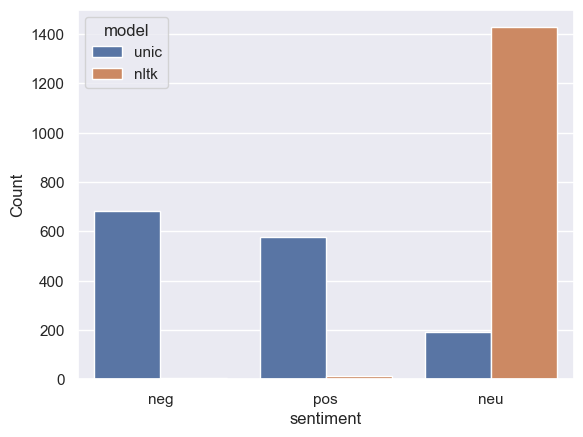

In [116]:

df_melted = d.melt('sentiment', var_name='model', value_name='Count')


sns.set(style="darkgrid")
ax = sns.barplot(x='sentiment', y='Count', hue='model', data=df_melted)
ax.set_ylabel('Count')

plt.show()


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
generatedTokens = pd.read_csv("generatedTokens.csv")
ca_accessToken = generatedTokens["access_token"].iloc[-1]

In [23]:
import json
import requests

In [43]:
last = sen_df.iloc[1328]
last

comment     If scientists keep begging governments to regu...
neg                                                     0.058
neu                                                     0.796
pos                                                     0.147
compound                                                0.743
Name: 1328, dtype: object

In [46]:
last_data= []
row_data = []
str = row['comment']
data = {'text': str,'accessToken': ca_accessToken}
response = requests.post("https://csat.alamedaproject.eu/classes", json=data)
resp = response.json()  
response.close()
sentiment_classes = resp.get("sentiment_classes")
max_score = sentiment_classes[0].get("sentiment_score")
max_sentiment = sentiment_classes[0].get("sentiment_class")
for sentiment in sentiment_classes:
    if sentiment.get("sentiment_score") > max_score:
        max_score = sentiment.get("sentiment_score")
        max_sentiment = sentiment.get("sentiment_class")
row_data.extend([max_sentiment, max_score])

last_data.append(row_data)

In [45]:
last_data = []

for idx, row in last.iterrows():
    row_data = []
    str = row['comment']
    data = {'text': str,'accessToken': ca_accessToken}
    response = requests.post("https://csat.alamedaproject.eu/classes", json=data)
    resp = response.json()  
    response.close()
    sentiment_classes = resp.get("sentiment_classes")
    max_score = sentiment_classes[0].get("sentiment_score")
    max_sentiment = sentiment_classes[0].get("sentiment_class")
    for sentiment in sentiment_classes:
        if sentiment.get("sentiment_score") > max_score:
            max_score = sentiment.get("sentiment_score")
            max_sentiment = sentiment.get("sentiment_class")
    row_data.extend([max_sentiment, max_score])

    last_data.append(row_data)




AttributeError: 'Series' object has no attribute 'iterrows'

In [47]:
last_df = pd.DataFrame(last_data, columns=['unic_sentiment', 'unic_score'])
last_df['unic_sentiment'] = last_df.unic_sentiment.apply(lambda x: 'pos' if x == 'positive' else 'neg' if x == 'negative' else 'neu')
last_df['unic_score'] = last_df.unic_score*0.01

In [49]:
fin = pd.concat([fin, last_df])

<AxesSubplot: xlabel='unic_sentiment', ylabel='count'>

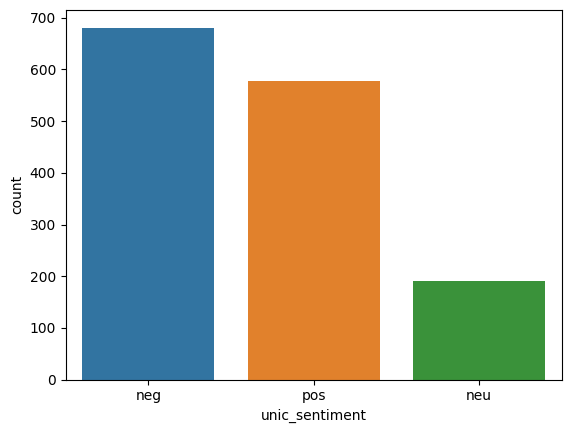

In [50]:
a = pd.DataFrame(fin.unic_sentiment.value_counts())

sns.barplot(a,x=a.index,y='count')